In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Supplement_Sales_Weekly_Expanded.csv")
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [7]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB


In [11]:
df.isna().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis='columns')

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Year,Month,Day
0,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,2020,1,6
1,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,2020,1,6
2,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,2020,1,6
3,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,2020,1,6
4,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,2020,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4379,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb,2025,3,31
4380,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart,2025,3,31
4381,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb,2025,3,31
4382,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon,2025,3,31


In [18]:
df['Estimated_Profit'] = df['Revenue'] * (1 - df['Discount'])
df['Return_Rate'] = df['Units Returned'] / df['Units Sold']
df['Revenue_Share'] = df['Revenue'] / df['Revenue'].sum()
df.head(5)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Year,Month,Day,Estimated_Profit,Return_Rate,Revenue_Share
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,2020,1,6,4435.9458,0.013986,0.000200
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,2020,1,6,5672.5344,0.000000,0.000258
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,2020,1,6,1558.8825,0.000000,0.000091
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,2020,1,6,2069.8160,0.000000,0.000098
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,2020,1,6,4176.5925,0.019108,0.000243


<Axes: xlabel='Date'>

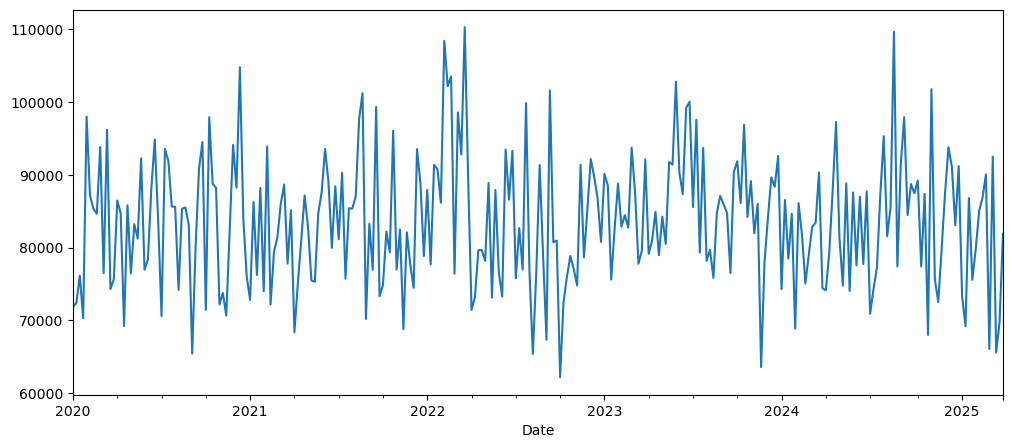

In [19]:
df.groupby('Date')['Revenue'].sum().plot(figsize=(12,5))


<Axes: xlabel='Year'>

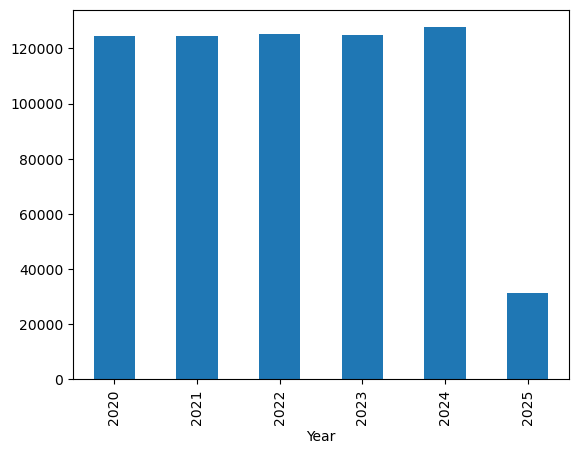

In [20]:
df.groupby('Year')['Units Sold'].sum().plot(kind='bar')


<Axes: xlabel='Category'>

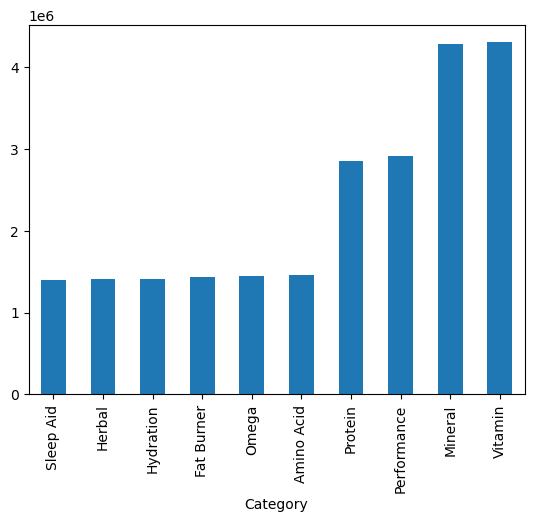

In [21]:
df.groupby('Category')['Revenue'].sum().sort_values().plot(kind='bar')


In [22]:
df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(10)


Product Name
Biotin             41533
Ashwagandha        41408
Fish Oil           41325
Pre-Workout        41287
Magnesium          41270
Whey Protein       41264
Creatine           41236
Zinc               41204
Iron Supplement    41194
Multivitamin       41174
Name: Units Sold, dtype: int64

<Axes: xlabel='Discount', ylabel='Revenue'>

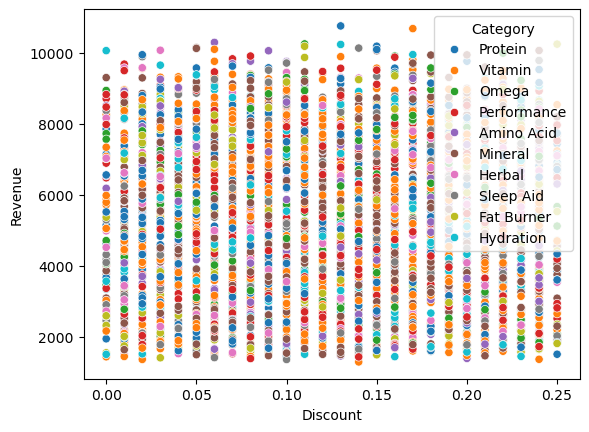

In [23]:
sns.scatterplot(data=df, x='Discount', y='Revenue', hue='Category')

<Axes: >

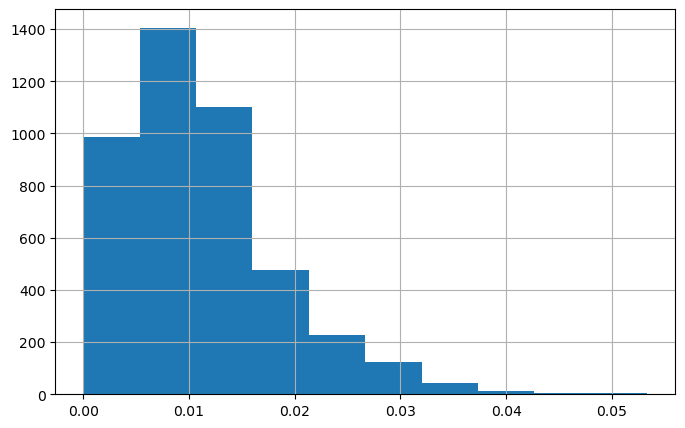

In [24]:
df['Return_Rate'].hist(figsize=(8,5))
